In [1]:
from pbpstats.client import Client
season_settings = {
    "dir": "C:/Users/bhalb/nbaproject/response_data",
    "Games": {"source": "file", "data_provider": "stats_nba"},
    # "Boxscore": {"source": "web", "data_provider": "data_nba"},
    # "Possessions": {"source": "file", "data_provider": "data_nba"},
}
game_settings = {
    "dir": "C:/Users/bhalb/nbaproject/response_data",
    "Boxscore": {"source": "file", "data_provider": "stats_nba"},
}
game_possessions_settings = {
    "dir": "C:/Users/bhalb/nbaproject/response_data",
    # "Boxscore": {"source": "file", "data_provider": "stats_nba"},
    "Possessions": {"source": "file", "data_provider": "stats_nba"},
}
season_client = Client(season_settings)
game_client = Client(game_settings)
possession_client = Client(game_possessions_settings)

# season1718 = season_client.Season("nba", "2017-18", "Regular Season")
game = possession_client.Game("0020500717")


In [6]:
from pbpstats.resources.enhanced_pbp import Foul

found = False
for i, pos in enumerate(game.possessions.items):
    for event in pos.events:
        if isinstance(event, Foul) and event.is_offensive_foul:
            print(i, pos.events)
            found = True
            break
    if found:
        break


29 [<StatsFoul GameId: 0020500717, Description: Howard OFF.Foul (P2), Time: 3:04, EventNum: 58>, <StatsTurnover GameId: 0020500717, Description: Howard Foul Turnover (P1.T2), Time: 3:04, EventNum: 59>]


In [17]:
game.boxscore.player_items[4]

{'game_id': '0020500717',
 'team_id': 1610612753,
 'team_abbreviation': 'ORL',
 'team_city': 'Orlando',
 'player_id': 2052,
 'name': 'DeShawn Stevenson',
 'start_position': 'G',
 'comment': '',
 'min': '46:30',
 'fgm': 6,
 'fga': 16,
 'fg_pct': 0.375,
 'fg3m': 0,
 'fg3a': 1,
 'fg3_pct': 0.0,
 'ftm': 2,
 'fta': 2,
 'ft_pct': 1.0,
 'oreb': 2,
 'dreb': 5,
 'reb': 7,
 'ast': 2,
 'stl': 0,
 'blk': 1,
 'to': 3,
 'pf': 6,
 'pts': 14,
 'plus_minus': -8.0}

In [19]:
from nba_api.stats.static import players
players.find_player_by_id(1917)

# Norm Richardson 1610612741
# Wang Zhizhi 1610612742
# Stanislav Medvedenko 1610612747
# Clarence Weatherspoon 1610612752
# Norm Richardson 1610612754
# Steve Smith 1610612759
# Isaac Austin 1610612763
# Isaac Fontaine 1610612763


{'id': 1917,
 'full_name': 'Wang Zhi-zhi',
 'first_name': 'Wang',
 'last_name': 'Zhi-zhi',
 'is_active': False}

In [83]:
from nba_api.stats.static import teams
team_abr = teams.find_team_name_by_id(1610612764)['abbreviation']

In [84]:
team_abr

'WAS'

In [7]:
import pandas as pd
path = f"C:/Users/bhalb/nbaproject/data/NBA_Player_IDs.csv"
ids_df = pd.read_csv(path, encoding='ANSI')
def map_id(br_id):
    try:
        return int(ids_df[ids_df['BBRefID'] == br_id]['NBAID'].item())
    except ValueError:
        return 0

In [89]:
map_id("hicksjj02")


0

In [1]:
from datetime import datetime

import importlib
import nba
import load_roster_br
importlib.reload(nba)
importlib.reload(load_roster_br)
from nba import NbaTracker

# data starts from 2000-01
seasons = [
    "2000-01",
    "2001-02",
    "2002-03",
    "2003-04",
    "2004-05",
    "2005-06",
    "2006-07",
    "2007-08",
    "2008-09",
    "2009-10",
    "2010-11",
    "2011-12",
    "2012-13",
    "2013-14",
    "2014-15",
    "2015-16",
    "2016-17",
    "2017-18",
    "2018-19",
    "2019-20",
    "2020-21"
]  # 19-20 was bubble season

nbaTracker = NbaTracker()
for season_name in seasons[12:]:
    nbaTracker.add_season(season_name)
    print("Loaded ", season_name, datetime.now().time())

Loaded  2012-13 12:07:04.893908
Loaded  2013-14 12:07:05.278876
adding 1610612737
adding 1610612738
adding 1610612739
adding 1610612740
adding 1610612741
adding 1610612742
adding 1610612743
adding 1610612744
adding 1610612745
adding 1610612746
adding 1610612747
adding 1610612748
adding 1610612749
adding 1610612750
adding 1610612751
adding 1610612752
adding 1610612753
adding 1610612754
adding 1610612755
adding 1610612756
adding 1610612757
adding 1610612758
adding 1610612759
adding 1610612760
adding 1610612761
adding 1610612762
adding 1610612763
adding 1610612764
adding 1610612765
adding 1610612766
Loaded  2014-15 12:10:14.150457
adding 1610612737
adding 1610612738
adding 1610612739
adding 1610612740
adding 1610612741
adding 1610612742
adding 1610612743
adding 1610612744
adding 1610612745
adding 1610612746
adding 1610612747
adding 1610612748
adding 1610612749
adding 1610612750
adding 1610612751
adding 1610612752
adding 1610612753
adding 1610612754
adding 1610612755
adding 1610612756
addi

In [7]:
for season_name in seasons[13:]:
    season = nbaTracker.seasons[season_name]
    for ts in season.team_seasons.values():
        roster = ts.roster
        print((roster.describe().T))
        break
    break


                count           mean           std     min        25%  \
id               18.0  174691.777778  67114.124325  1882.0  201321.75   
weight           18.0     226.500000     35.224073   172.0     204.25   
exp              18.0       3.777778      3.949022     0.0       1.00   
age              18.0      26.111111      3.833120    20.0      23.00   
games            18.0      46.333333     28.639750     2.0      21.50   
games_started    18.0      22.777778     29.486898     0.0       0.00   
minutes_played   18.0    1101.722222    896.890629     3.0     268.50   
pts              18.0     460.111111    423.434958     0.0      85.00   
fg2m             18.0     127.388889    125.185575     0.0      35.75   
fg2a             18.0     254.000000    252.063951     1.0      78.00   
fg3m             18.0      42.666667     49.976465     0.0       0.75   
fg3a             18.0     117.555556    121.850063     0.0       4.75   
ftm              18.0      77.333333     92.468755 

In [8]:

for sn in nbaTracker.seasons:
    season = nbaTracker.seasons[sn]
    for tn, ts in season.team_seasons.items():
        try:
            ts.roster
        except:
            print(sn, tn, "roster")
        try:
            ts.roster_df
        except:
            print(sn, tn, "roster_df")
        print(ts)
        break
    
# p1 = season.games[0].players[0]
# roster_df = season.team_seasons[p1['team_id']].roster_df
# roster = season.team_seasons[p1['team_id']].roster
# team = season.team_seasons[p1['team_id']]


In [6]:
nbaTracker

In [38]:
roster_df

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID
0,1610612766,2001,00,Baron Davis,Baron,baron-davis,1,G,6-3,223,"APR 13, 1979",23.0,2,UCLA,1884
1,1610612766,2001,00,Stacey Augmon,Stacey,stacey-augmon,2,F-G,6-8,213,"AUG 01, 1968",33.0,10,UNLV,278
2,1610612766,2001,00,David Wesley,David,david-wesley,4,G,6-1,203,"NOV 14, 1970",31.0,8,Baylor,133
3,1610612766,2001,00,Elden Campbell,Elden,elden-campbell,5,C-F,7-0,279,"JUL 23, 1968",33.0,11,Clemson,922
4,1610612766,2001,00,George Lynch,George,george-lynch,9,F,6-8,228,"SEP 03, 1970",31.0,8,North Carolina,248
5,1610612766,2001,00,Bryce Drew,Bryce,bryce-drew,17,G,6-3,184,"SEP 21, 1974",27.0,3,Valparaiso,1724
6,1610612766,2001,00,Jamaal Magloire,Jamaal,jamaal-magloire,21,C,6-11,259,"MAY 21, 1978",24.0,1,Kentucky,2048
7,1610612766,2001,00,Jamal Mashburn,Jamal,jamal-mashburn,24,F,6-8,247,"NOV 29, 1972",29.0,8,Kentucky,469
8,1610612766,2001,00,Robert Traylor,Robert,robert-traylor,34,F-C,6-8,284,"FEB 01, 1977",25.0,3,Michigan,1714
9,1610612766,2001,00,Kirk Haston,Kirk,kirk-haston,35,F,6-9,242,"MAR 10, 1979",23.0,R,Indiana,2213


In [75]:
for season in nbaTracker.seasons.values():
    print(season.name)
    for team in season.team_seasons.values():
        roster = team.roster
        roster_df = team.roster_df
        for row, p in roster_df.iterrows():
            for d in roster.values():
                if p['PLAYER_ID'] in d['player_info'][1]:
                    break
            else:
                # print(p['PLAYER'])
                bday = p['BIRTH_DATE']
                bday = datetime.strptime(bday, "%b %d, %Y")
                # bday == d['player_info'][5] 
                exp = p['EXP']
                exp = 0 if exp == 'R' else int(exp)
                lname1 = p['PLAYER'].split(" ")[-1].strip("-")
                lname2 = d['player_info'][0].split(" ")[-1].strip("-")
                match = (lname1 == lname2)
                for d in roster.values():
                    if len(d['player_info'][1]) == 0:
                        if match:
                            print("match", p['PLAYER'], d['player_info'][0])
                            print(lname1, lname2, team.id)
                            # d['player_info'][1].append(p['PLAYER_ID'])
                        else:
                            pass
                            # print("No match", lname1, lname2, team.id)
    

2000-01
match Clar. Weatherspoon Clarence Weatherspoon
Weatherspoon Weatherspoon 1610612739
2001-02
match Clar. Weatherspoon Clarence Weatherspoon
Weatherspoon Weatherspoon 1610612752
match Steven Smith Steve Smith
Smith Smith 1610612759
2002-03
2003-04
2004-05
2005-06
2006-07
match JR Smith J.R. Smith
Smith Smith 1610612743
2007-08
2008-09
2009-10
match JR Smith J.R. Smith
Smith Smith 1610612743
2010-11
match DJ White D.J. White
White White 1610612766
2011-12
match Shawne Williams J.J. Hickson
Williams Williams 1610612757
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21


In [7]:
for i, d in enumerate(roster.values()):
    if p1['player_id'] in d['player_info'][1]:
        print(d)
        break


{'player_info': ['Paul Pierce', [1718], 'SG', '6-7', 235, datetime.datetime(1977, 10, 13, 0, 0), 'us', 3, 'Kansas'], 'season_totals': [24, 82, 82, 3302, 2144, 497, 1078, 210, 520, 520, 643, 81, 485, 261, 154, 86, 241, 237]}


In [13]:
for team in season.team_seasons.values():
    r = team.roster
    for player, d in r.items():
        if len(d['player_info'][1]) == 0:
            print(player, team.id)


Norm Richardson 1610612741
Wang Zhizhi 1610612742
Stanislav Medvedenko 1610612747
Clarence Weatherspoon 1610612752
Norm Richardson 1610612754
Steve Smith 1610612759
Isaac Austin 1610612763
Isaac Fontaine 1610612763


In [12]:
from datetime import datetime

import importlib
import nba
import load_roster_br
importlib.reload(nba)
importlib.reload(load_roster_br)
from nba import NbaTracker

# data starts from 2000-01
seasons = [
    "2000-01",
    "2001-02",
    "2002-03",
    "2003-04",
    "2004-05",
    "2005-06",
    "2006-07",
    "2007-08",
    "2008-09",
    "2009-10",
    "2010-11",
    "2011-12",
    "2012-13",
    "2013-14",
    "2014-15",
    "2015-16",
    "2016-17",
    "2017-18",
    "2018-19",
    "2019-20",
    "2020-21"
]  # 19-20 was bubble season

nbaTracker = NbaTracker()
for season_name in seasons[0:5]:
    nbaTracker.load_season(season_name)
    print("Loaded ", season_name, datetime.now().time())

Loaded  2000-01 12:41:31.822000
Loaded  2001-02 12:41:40.341193
Loaded  2002-03 12:41:48.720550
Loaded  2003-04 12:41:59.499181
Loaded  2004-05 12:42:01.535264


In [13]:
games = nbaTracker.build_points_data() # games, players, (stats, targets)

In [19]:
num_games = len(games)
num_players = 10
num_stats = len(games[0][0][0])

In [26]:
num_stats

21

In [21]:
import numpy as np

In [45]:
X = [[player[0] for player in game] for game in games if len(game) == 10]


In [49]:
y = [[stat for player in game for stat in player[1]] for game in games if len(game) == 10]


In [46]:
count = 0
for game in games:
    if len(game) != 10:
        print(len(game))
        count += 1
    for player in game:
        if len(player[0]) != num_stats:
            print("bad player")
            break


9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


In [43]:
count

16

In [47]:
X = np.array(X)

In [48]:
X.shape

(4781, 10, 21)

In [51]:
y = np.array(y)

In [52]:
y.shape

(4781, 30)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tp = scaler.fit_transform(X_train.reshape(
    len(X_train)*10, 21)).reshape(len(X_train), 10, 21)
X_vp = scaler.transform(X_val.reshape(
    len(X_val)*10, 21)).reshape(len(X_val), 10, 21)
X_test_p = scaler.transform(X_text.reshape(
    len(X_text)*10, 21)).reshape(len(X_text), 10, 21)


(479, 10, 21)

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input

input = Input(shape=X.shape[1:])
conv1 = Conv1D(64, 1, activation='relu', use_bias=True)(input)
conv2 = Conv1D(64, 1, activation='relu', use_bias=True)(conv1)
flat = Flatten()(conv2)
d1 = Dense(128, activation='relu')(flat)
output = Dense(30)(d1)

In [87]:
X_tp.shape[0] / 32

107.53125

In [62]:
from tensorflow.keras.models import Model
model = Model(inputs=[input], outputs=[output])
model.compile(optimizer='adam', loss='mse')

In [102]:
X_train.reshape(-1, 21)[3], X_train[0][3]


(array([6.58333333e+00, 2.35000000e+02, 2.40000000e+01, 3.00000000e+00,
        9.50000000e+01, 2.42686872e+03, 1.11079047e-02, 2.84463980e-03,
        5.92816488e-03, 1.09329427e-03, 2.59676126e-03, 2.13874231e-03,
        2.96344358e-03, 4.77424384e-04, 2.58462631e-03, 1.12311487e-03,
        6.65582165e-04, 4.51848200e-04, 1.42212893e-03, 1.47908517e-03,
        2.73850212e-04]),
 array([6.58333333e+00, 2.35000000e+02, 2.40000000e+01, 3.00000000e+00,
        9.50000000e+01, 2.42686872e+03, 1.11079047e-02, 2.84463980e-03,
        5.92816488e-03, 1.09329427e-03, 2.59676126e-03, 2.13874231e-03,
        2.96344358e-03, 4.77424384e-04, 2.58462631e-03, 1.12311487e-03,
        6.65582165e-04, 4.51848200e-04, 1.42212893e-03, 1.47908517e-03,
        2.73850212e-04]))

In [104]:
singleInput = Input(shape=X.shape[2:])
singleD1 = Dense(64, activation='relu')(singleInput)
singleD2 = Dense(64, activation='relu')(singleD1)
singleOutput = Dense(3)(singleD2)
singleModel = Model(inputs=[singleInput], outputs=[singleOutput])
singleModel.compile(optimizer='adam', loss='mse')


In [105]:
singleHistory = singleModel.fit(
    x=X_tp.reshape(-1, 21), y=y_train.reshape(-1, 3), epochs=30, validation_data=(X_vp.reshape(-1, 21), y_val.reshape(-1, 3)))


Epoch 1/30
1076/1076 [==============================] - 2s 2ms/step - loss: 22.0060 - val_loss: 18.4772
Epoch 2/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.8717 - val_loss: 17.8334
Epoch 3/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.5556 - val_loss: 17.7269
Epoch 4/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.4273 - val_loss: 17.5764
Epoch 5/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.3653 - val_loss: 17.9935
Epoch 6/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.3412 - val_loss: 17.5615
Epoch 7/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.3161 - val_loss: 17.5127
Epoch 8/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.2718 - val_loss: 17.9143
Epoch 9/30
1076/1076 [==============================] - 2s 2ms/step - loss: 17.2574 - val_loss: 17.7039
Epoch 10/30
1076/1076 [==============================] - 2s 2ms/

In [84]:
history = model.fit(x=X_tp, y=y_train, epochs=30, validation_data=(X_vp, y_val))

Epoch 1/30
108/108 [==============================] - 1s 7ms/step - loss: 30.8871 - val_loss: 21.1901
Epoch 2/30
108/108 [==============================] - 0s 3ms/step - loss: 19.4070 - val_loss: 19.0830
Epoch 3/30
108/108 [==============================] - 0s 4ms/step - loss: 18.1932 - val_loss: 18.4172
Epoch 4/30
108/108 [==============================] - 0s 3ms/step - loss: 17.6963 - val_loss: 18.2551
Epoch 5/30
108/108 [==============================] - 0s 3ms/step - loss: 17.4339 - val_loss: 18.3299
Epoch 6/30
108/108 [==============================] - 0s 4ms/step - loss: 17.2434 - val_loss: 18.0185
Epoch 7/30
108/108 [==============================] - 0s 4ms/step - loss: 17.0473 - val_loss: 18.0121
Epoch 8/30
108/108 [==============================] - 0s 3ms/step - loss: 16.8771 - val_loss: 18.0164
Epoch 9/30
108/108 [==============================] - 0s 4ms/step - loss: 16.8166 - val_loss: 17.8863
Epoch 10/30
108/108 [==============================] - 0s 3ms/step - loss: 16.6570

In [88]:
y_pred = model.predict(X_test_p[:])

In [106]:
y_pred = singleModel.predict(X_test_p.reshape(-1,21)[:])


In [89]:
dif = y_pred - y_test[:]

In [107]:
singleDif = y_pred - y_test.reshape(-1,3)[:]


In [91]:
y_pred[:1], y_test[:1]

(array([[ 7.7721653,  3.8078358,  1.6662111, 22.473686 , 12.9630995,
          3.136601 ,  7.8803043,  6.250808 ,  1.1788315, 16.657135 ,
          3.2716944,  6.050258 , 13.907471 ,  3.9993277,  1.8275493,
          6.7479615,  4.8825574,  1.4050993,  7.188099 ,  4.8350706,
          0.9372112, 13.848506 ,  8.77355  ,  1.4450566, 16.827734 ,
          6.221202 ,  6.019349 , 18.577887 ,  4.586609 ,  2.0022175]],
       dtype=float32),
 array([[ 5,  5,  3, 17,  9,  3, 14, 10,  1, 16,  2,  4,  8,  3,  7,  2,
          2,  1, 12,  7,  0, 14,  9,  2, 21,  8,  8,  8,  3,  1]]))

In [112]:
singleDif.std(), dif.std()

(4.167276121453978, 4.209751736626716)

In [90]:
dif.mean()

-0.010219343654842492

In [ ]:
# predict points for next game
# multiclass or multilabel classification?
# what features to use


In [14]:
# get data

points_data = nbaTracker.build_points_data()


In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(points_data)

In [20]:
train

,points_scored,ave_points_this_season,games_played_this_season,ave_gt_this_season,ave_points_last_season,games_played_last_season,ave_gt_last_season,played_last_game
80322,10,7.866667,30,1782.833333,6.890244,82,1922.365854,False
311,12,4.000000,1,1465.000000,0.000000,0,0.000000,False
92618,39,22.969231,65,2187.907692,22.534247,73,2290.000000,False
45756,3,9.878378,74,1783.054054,4.333333,12,804.166667,False
42253,36,30.606557,61,2512.819672,25.237500,80,2298.850000,False
...,...,...,...,...,...,...,...,...
20261,12,5.789474,19,1035.842105,10.534247,73,1486.041096,False
76685,15,9.500000,6,957.166667,5.264151,53,851.811321,False
89805,3,4.948276,58,1448.293103,5.589041,73,1212.123288,False
66547,1,6.274194,62,1548.241935,4.547945,73,1029.150685,False


In [21]:
import pandas as pd
train: pd.DataFrame
X_train, y_train = train.drop("points_scored", axis=1), train["points_scored"]

In [23]:
X_train.to_numpy()

array([[7.866666666666666, 30, 1782.8333333333333, ..., 82,
        1922.3658536585365, False],
       [4.0, 1, 1465.0, ..., 0, 0.0, False],
       [22.96923076923077, 65, 2187.9076923076923, ..., 73, 2290.0,
        False],
       ...,
       [4.948275862068965, 58, 1448.2931034482758, ..., 73,
        1212.123287671233, False],
       [6.274193548387097, 62, 1548.241935483871, ..., 73,
        1029.150684931507, False],
       [7.1454545454545455, 55, 1119.490909090909, ..., 81,
        1429.2222222222222, False]], dtype=object)

<AxesSubplot:xlabel='ave_points_last_season', ylabel='points_scored'>

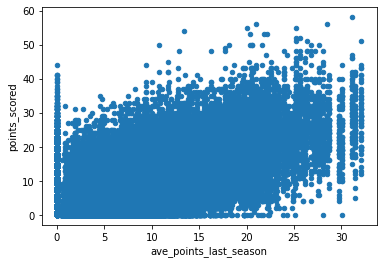

In [18]:
# visualize data
train.plot(kind="scatter", x="ave_points_last_season", y="points_scored")

In [19]:
train.corr()["points_scored"].sort_values(ascending=False)

points_scored               1.000000
ave_points_this_season      0.704227
ave_gt_this_season          0.615450
ave_points_last_season      0.601585
ave_gt_last_season          0.479306
games_played_last_season    0.276445
games_played_this_season    0.152016
played_last_game                 NaN
Name: points_scored, dtype: float64

In [31]:
# prepare data, build transformers
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

ave_points_this_ix = 0
games_played_this_ix = 1
ave_gt_this_ix = 2
ave_points_last_ix = 3
games_played_last_ix = 4
ave_gt_last_ix = 5

class CalcAverages(BaseEstimator, TransformerMixin):
    def __init__(self, this_season_weight=3) -> None:
        super().__init__()
        self.this_season_weight = this_season_weight

    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        total_weighted_games = X[:, games_played_this_ix] * self.this_season_weight + X[:, games_played_last_ix]
        total_weighted_games = np.where(total_weighted_games > 0, total_weighted_games, 1)
        ave_pts = (X[:, games_played_this_ix] * self.this_season_weight * X[:, ave_points_this_ix] +
                                                      X[:, games_played_last_ix] * X[:, ave_points_last_ix]) / total_weighted_games
        ave_gt = (X[:, games_played_this_ix] * self.this_season_weight * X[:, ave_gt_this_ix] +
                                                     X[:, games_played_last_ix] * X[:, ave_gt_last_ix]) / total_weighted_games
        return np.c_[X[:, 0:6], ave_pts, ave_gt ]



In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('add_ave', CalcAverages()), ('std_scaler', StandardScaler())])

X_train_p = pipeline.fit_transform(X_train.to_numpy())

In [34]:
X_train_p.shape

(72419, 8)

In [35]:
# select a model and train it
from sklearn.linear_model import Ridge, LogisticRegression
reg = Ridge()
clf = LogisticRegression()

reg.fit(X_train_p, y_train)

some_data, some_labels = X_train_p[:10], y_train[:10]


In [38]:
list(zip(reg.predict(some_data),some_labels))

[(7.559255005591691, 10),
 (4.32204048808245, 12),
 (22.89624799866327, 39),
 (10.300675352895716, 3),
 (29.79090216529714, 36),
 (11.166644833363467, 12),
 (2.6808917889515653, 0),
 (8.858822912310282, 15),
 (10.7302144879541, 5),
 (5.491059469430437, 3)]

In [40]:
reg.coef_

array([ 1.78372315,  0.06948985,  0.44356773, -0.64485658,  0.08057369,
       -0.0340447 ,  4.78717938, -0.63792315])

In [ ]:
# fine tune model

In [ ]:
# present solution

In [ ]:
# deploy